## EN2550: Assignment 03 on Object Counting on a Conveyor Belt
### Index Number: 190696U
### Name :  Wijegunawardana C.H.W.

### Connected Component Analysis

1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display.

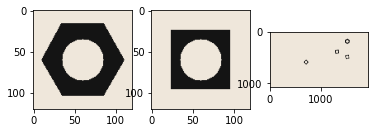

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt.subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

2. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image.

In [3]:
# Convert to Grayscale

hexnut_gray = cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_gray = cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
belt_gray = cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

Threshold of Hexnut = 20.0
Threshold of Squarenut = 20.0
Threshold of Belt = 20.0


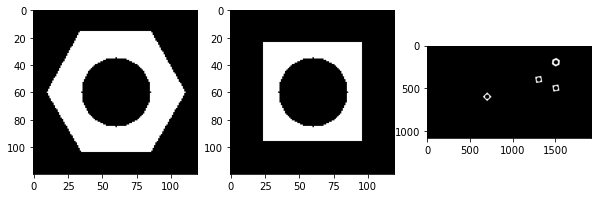

In [4]:
# Apply Otsu Thresholding

th_h, hexnut = cv.threshold(hexnut_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_s, squarenut = cv.threshold(squarenut_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_b, belt = cv.threshold(belt_gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

print("Threshold of Hexnut =", th_h)
print("Threshold of Squarenut =", th_s)
print("Threshold of Belt =", th_b)

fig, ax = plt. subplots(1,3,figsize=(10,10))
ax[0].imshow(hexnut, cmap='gray')
ax[1].imshow(squarenut, cmap='gray')
ax[2].imshow(belt, cmap='gray')
plt.show()

3. Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel.

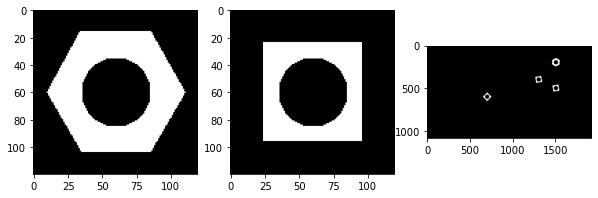

In [5]:
kernel = np.ones((3,3),np.uint8) #defining the kernal to indicate the number of neighbouring pixels we consider.
closing_hexnut = cv.morphologyEx(hexnut, cv.MORPH_CLOSE, kernel)
closing_squarenut = cv.morphologyEx(squarenut, cv.MORPH_CLOSE, kernel)
closing_belt = cv.morphologyEx(belt, cv.MORPH_CLOSE, kernel)

#viewing the result
fig, ax = plt. subplots(1,3,figsize=(10,10))
ax[0].imshow(closing_hexnut, cmap='gray')
ax[1].imshow(closing_squarenut, cmap='gray')
ax[2].imshow(closing_belt, cmap='gray')
plt.show()

4. Apply the connectedComponentsWithStats function.

In [6]:
retval_h, labels_h, stats_h, centroids_h = cv.connectedComponentsWithStats(closing_hexnut)
retval_s, labels_s, stats_s, centroids_s = cv.connectedComponentsWithStats(closing_squarenut)
retval_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_belt)

print("Number of connected components in the belt =", retval_b)

Number of connected components in the belt = 5


b. What are the statistics?

Each row contains the statistics for each occurances of a connected component. The first row always corresponds to the background.

1. col=1: The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
2. col=2: The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
3. col=3: The horizontal size of the bounding box (width).
4. col=4: The vertical size of the bounding box (height).
5. col=5: The total area (in pixels) of the connected component.

In [8]:
print("Statistics of Hexnut =")
print(stats_h)
print("Statistics of Squarenut =")
print(stats_s)
print("Statistics of Belt =")
print(stats_b)

Statistics of Hexnut =
[[   0    0  120  120 9672]
 [  10   16  101   88 4728]]
Statistics of Squarenut =
[[    0     0   120   120 11173]
 [   24    24    72    72  3227]]
Statistics of Belt =
[[      0       0    1920    1080 2059646]
 [   1454     150      92     100    4636]
 [   1259     359      82      82    3087]
 [   1459     459      82      82    3087]
 [    650     550     101     101    3144]]


In [11]:
print("Centroids of each nut on the belt =")
print(centroids_b[1:]) # leaving out the first centriod which is the background

Centroids of each nut on the belt =
[[1499.24201898  199.28515962]
 [1299.18302559  399.18302559]
 [1499.18302559  499.18302559]
 [ 700.          600.        ]]


5. Use findContours function to retrieve the extreme outer contours.

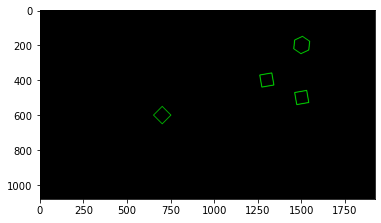

In [16]:
contours_h, hierarchy_h = cv.findContours(closing_hexnut, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_s, hierarchy_s = cv.findContours(closing_squarenut, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_b, hierarchy_b = cv.findContours(closing_belt, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Visualizing contours
im_contours_belt = np.zeros((belt_gray.shape[0],belt_gray.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours_belt, contours_b, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts)

### Detecting Objects on a Synthetic Conveyor

1. Open the sequence and play it using the code below.

In [14]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


2. Count the number of matching hexagonal nuts in conveyor_f100.png.

In [21]:
label = 1 # the label of the background is 0
belt = ((labels_b >= label)*255).astype('uint8')  
# Find contours using the external edge of the connected components
contours_b, hierarchy_b = cv.findContours(closing_belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
n_hex = 0

print("Match each contour with the templates:")
objectNum=0  
for j,c in enumerate(contours_b):
        print("Object",objectNum)
        match_hex = cv.matchShapes(contours_h[0], c, cv.CONTOURS_MATCH_I1, 0.0)
        match_square = cv.matchShapes(contours_s[0], c, cv.CONTOURS_MATCH_I1, 0.0)
        print("Match with Hexnut :",match_hex)
        print("Match with Squarenut :",match_square)
        if (match_hex < match_square):
                n_hex += 1
        objectNum+=1

print()
print("Number of Hexagonal Nuts =", n_hex)

Match each contour with the templates:
Object 0
Match with Hexnut : 0.026949348359551983
Match with Squarenut : 6.816769371198461e-14
Object 1
Match with Hexnut : 0.027050230004169284
Match with Squarenut : 0.0001008816445491334
Object 2
Match with Hexnut : 0.027050230004169284
Match with Squarenut : 0.0001008816445491334
Object 3
Match with Hexnut : 8.228790019826349e-05
Match with Squarenut : 0.026867060459421888

Number of Hexagonal Nuts = 1


3. Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video.

In [23]:
# Function to process each frame by thresholding, closing, connected component analysis
def process(img):
    """
    Input: Image
    Performs: Otsu Thresholding, Closing and Connected Component Analysis
    Output: statistics of the connected components
    """
    kernel = np.ones((3,3),np.uint)  # define the kernal size
    th_thresh, img_thresh = cv.threshold(img,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)      # apply othsu's thresholding
    closing_img = cv.morphologyEx(img_thresh, cv.MORPH_CLOSE, kernel)    # apply closing to the binary image
    retval, labels, stats, centroids = cv.connectedComponentsWithStats(closing_img)     # finding the statistics of the countours detected
    return retval, labels, stats, centroids 

In [ ]:
# Function to detect the similarity between two frames
def detect_diff(a, b, delta, i):
    """
    Input: a, b : Two vectors to compare
           delta: Vector of difference 
           i    : Specifies the indexes of the vectors to compare
    Output : True if the difference of vectors a and b exceed the delta values
    """
    # taking a-b of the ith coulmn and comparing it with delta_i
    # check all values are grater than delta_i
    return ((np.abs(a - b))[:,i] > delta[i]).all()                 
   

In [ ]:
# Use the above two functions to compare the conveyor_f100.png and conveyor_f101.png.